In [6]:
import pandas as pd
df=pd.read_csv('/content/KRS Dam - Time Series - Transposed.csv')
df.head()

,PARAMETERS,NITR_Min,BOD_Max,PH_Max,Temp_Max,PH_Min,TC_Min,Temp_Min,TC_Max,BOD_Min,CON_Max,CON_Min,DO_Max,DO_Min,FC_Max,FC_Min,NITR_Max
0,2009,0.17,1.0,8.9,30,6.8,7,26,1600,1.0,319,89,9.5,6.6,1601,4,1.68
1,2010,0.19,1.0,8.9,30,7.9,1600,25,1600,1.0,380,81,8.5,6.3,1600,1600,1.43
2,2011,0.12,1.0,8.9,28,8.1,1600,24,1600,1.0,322,122,7.8,6.0,1600,1600,0.80
3,2012,0.15,2.0,8.7,28,7.5,1100,25,1600,1.0,285,100,8.0,6.3,1600,170,0.49
4,2013,0.15,2.0,8.9,29,7.1,470,24,2200,1.0,359,80,8.0,5.5,580,110,0.49


In [37]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.5 MB/s eta 0:00:00


In [38]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(df['2020'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

ValueError: ignored

In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00


In [3]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [30]:
df = pd.read_csv('/content/KRS Dam - Time Series - Transposed.csv')

In [31]:
df.head()

,PARAMETERS,NITR_Min,BOD_Max,PH_Max,Temp_Max,PH_Min,TC_Min,Temp_Min,TC_Max,BOD_Min,CON_Max,CON_Min,DO_Max,DO_Min,FC_Max,FC_Min,NITR_Max
0,2009,0.17,1.0,8.9,30,6.8,7,26,1600,1.0,319,89,9.5,6.6,1601,4,1.68
1,2010,0.19,1.0,8.9,30,7.9,1600,25,1600,1.0,380,81,8.5,6.3,1600,1600,1.43
2,2011,0.12,1.0,8.9,28,8.1,1600,24,1600,1.0,322,122,7.8,6.0,1600,1600,0.80
3,2012,0.15,2.0,8.7,28,7.5,1100,25,1600,1.0,285,100,8.0,6.3,1600,170,0.49
4,2013,0.15,2.0,8.9,29,7.1,470,24,2200,1.0,359,80,8.0,5.5,580,110,0.49


In [32]:
features = df.columns
features = list(features)
features

['PARAMETERS',
 'NITR_Min',
 'BOD_Max',
 'PH_Max',
 'Temp_Max',
 'PH_Min',
 'TC_Min',
 'Temp_Min',
 'TC_Max',
 'BOD_Min',
 'CON_Max',
 'CON_Min',
 'DO_Max',
 'DO_Min',
 'FC_Max',
 'FC_Min',
 'NITR_Max']

In [33]:
df.isna().sum()

PARAMETERS    0
NITR_Min      0
BOD_Max       0
PH_Max        0
Temp_Max      0
PH_Min        0
TC_Min        0
Temp_Min      0
TC_Max        0
BOD_Min       0
CON_Max       0
CON_Min       0
DO_Max        0
DO_Min        0
FC_Max        0
FC_Min        0
NITR_Max      0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PARAMETERS  12 non-null     int64  
 1   NITR_Min    12 non-null     float64
 2   BOD_Max     12 non-null     float64
 3   PH_Max      12 non-null     float64
 4   Temp_Max    12 non-null     int64  
 5   PH_Min      12 non-null     float64
 6   TC_Min      12 non-null     int64  
 7   Temp_Min    12 non-null     int64  
 8   TC_Max      12 non-null     int64  
 9   BOD_Min     12 non-null     float64
 10  CON_Max     12 non-null     int64  
 11  CON_Min     12 non-null     int64  
 12  DO_Max      12 non-null     float64
 13  DO_Min      12 non-null     float64
 14  FC_Max      12 non-null     int64  
 15  FC_Min      12 non-null     int64  
 16  NITR_Max    12 non-null     float64
dtypes: float64(8), int64(9)
memory usage: 1.7 KB


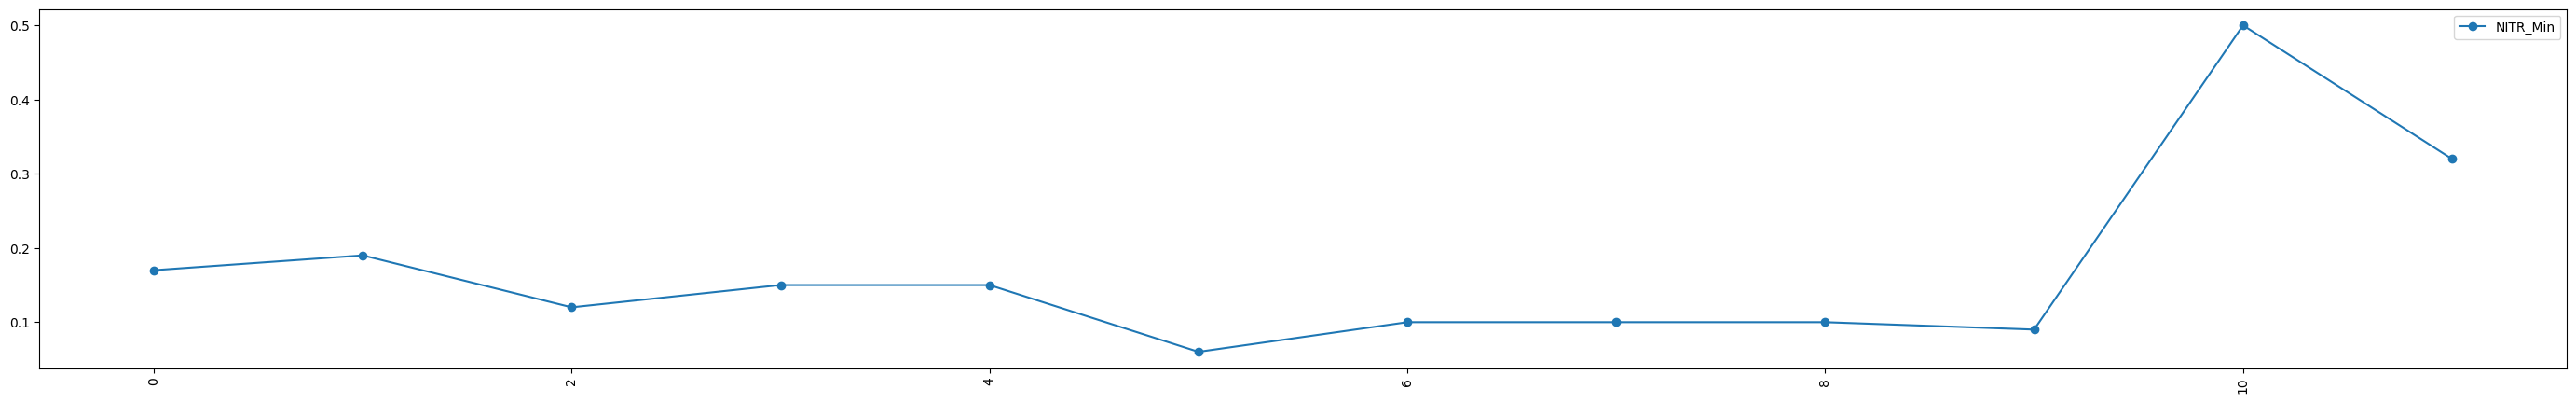

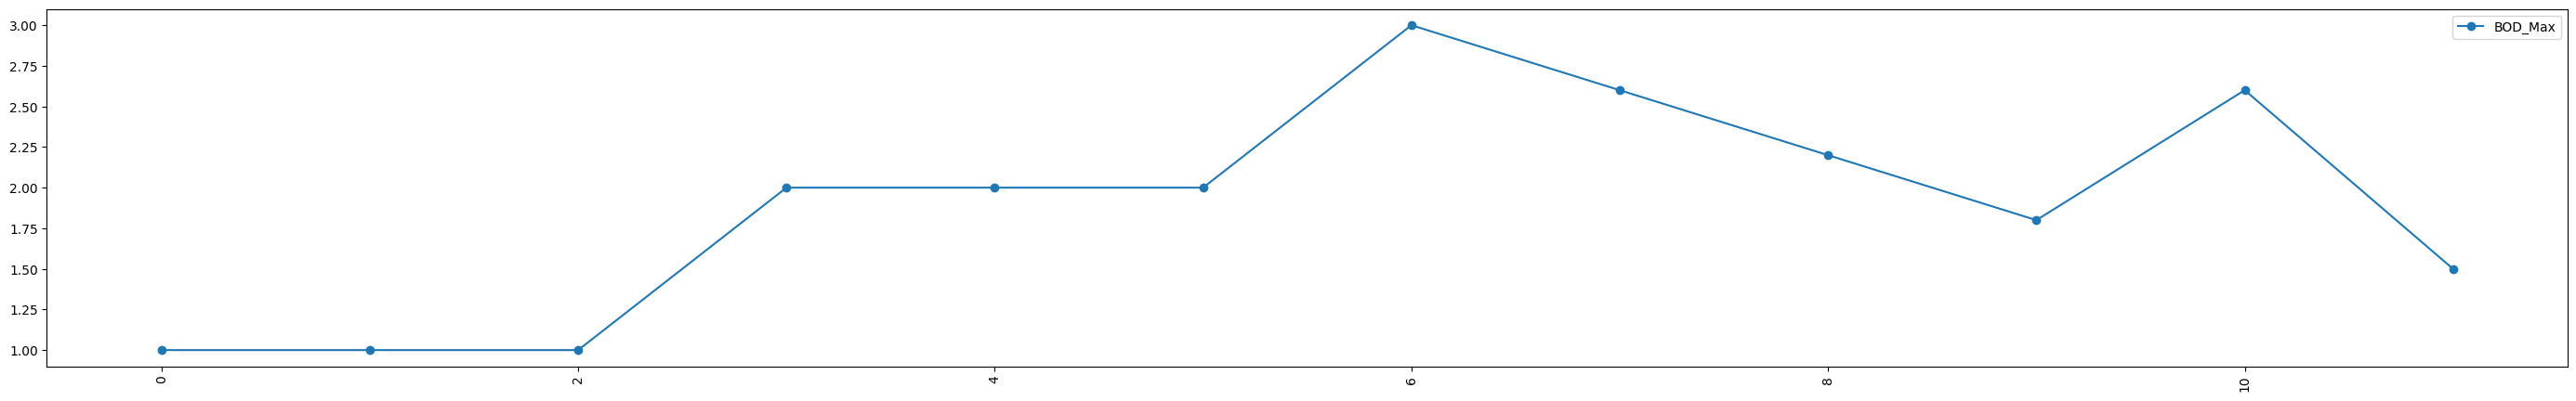

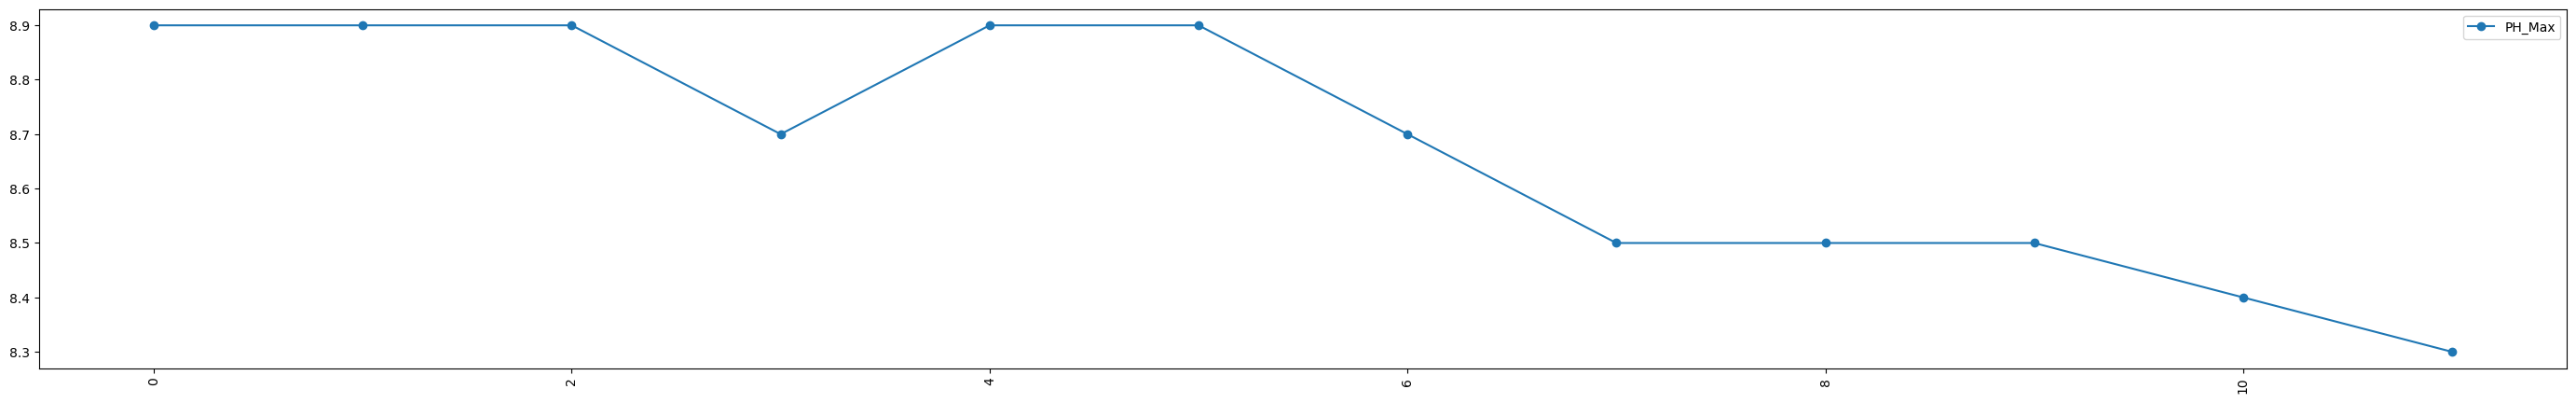

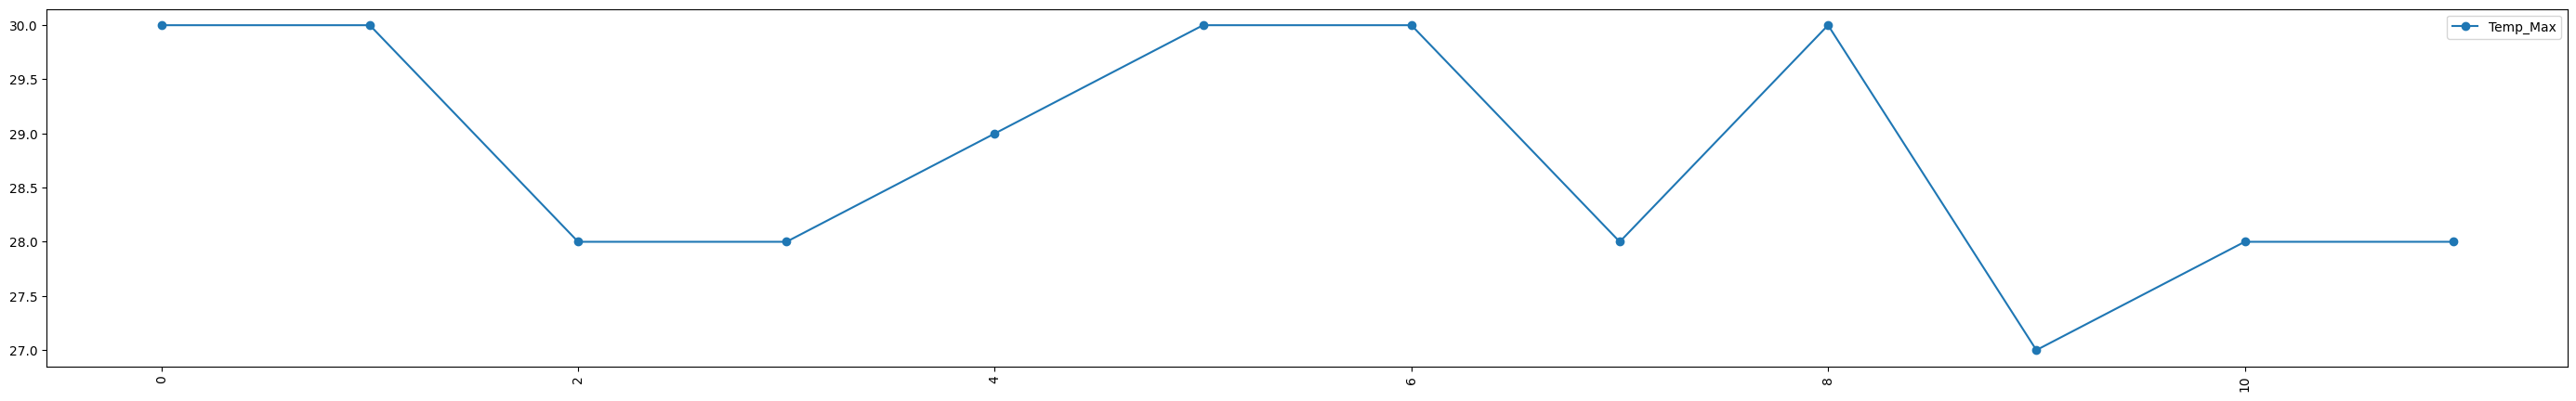

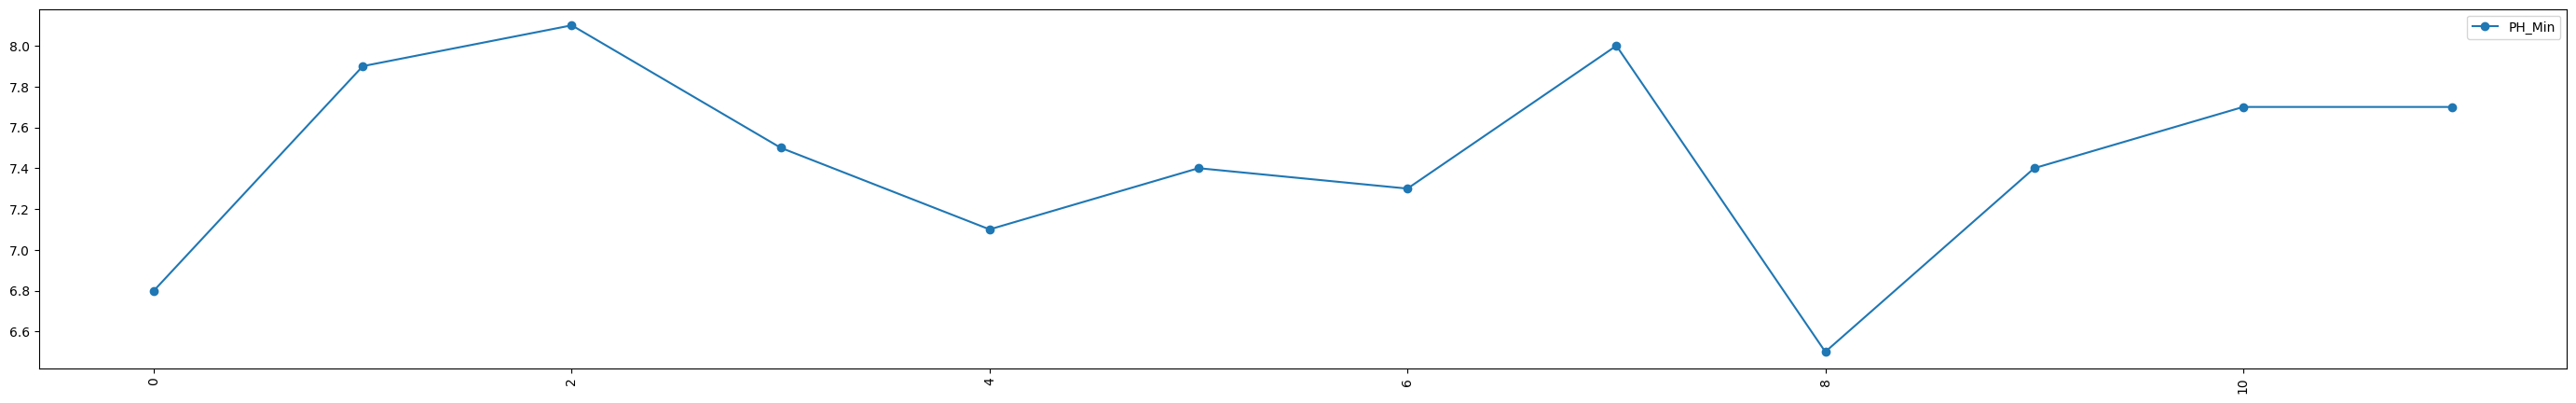

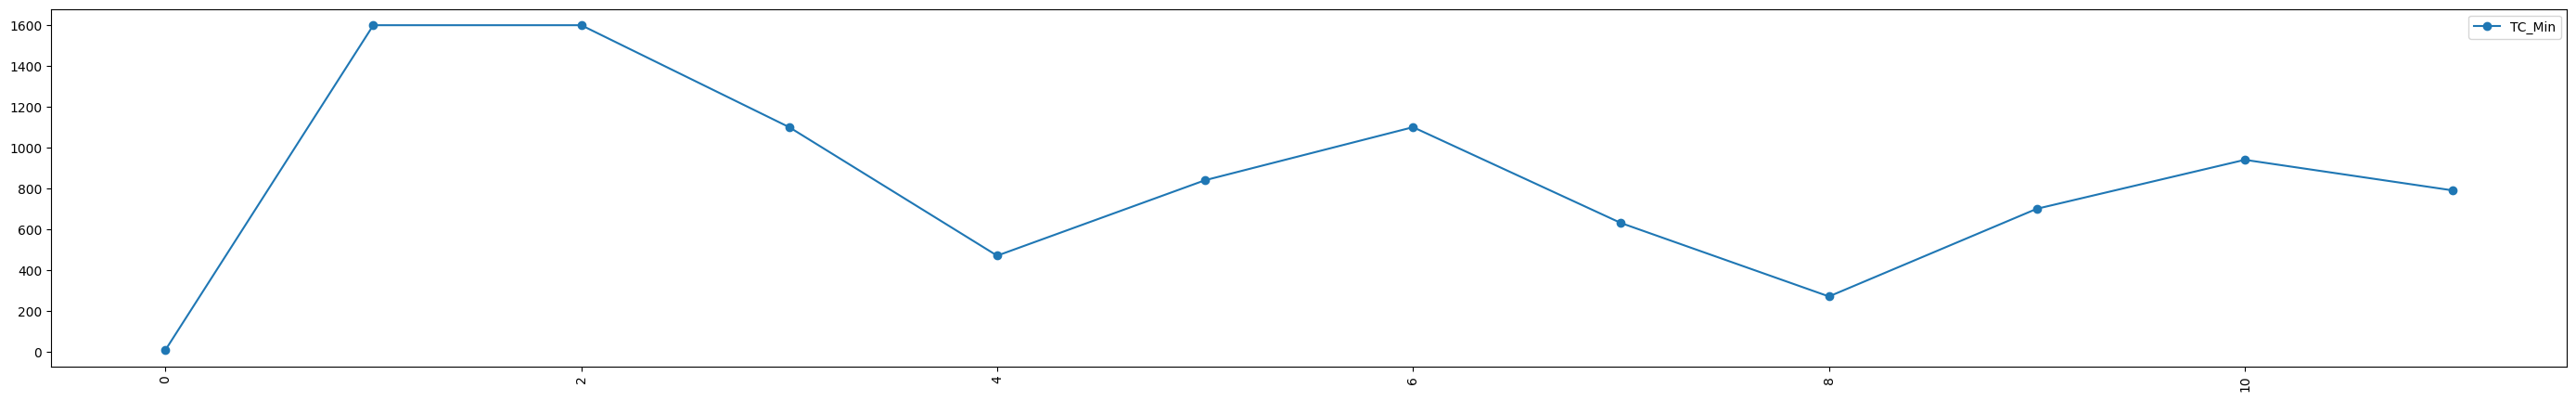

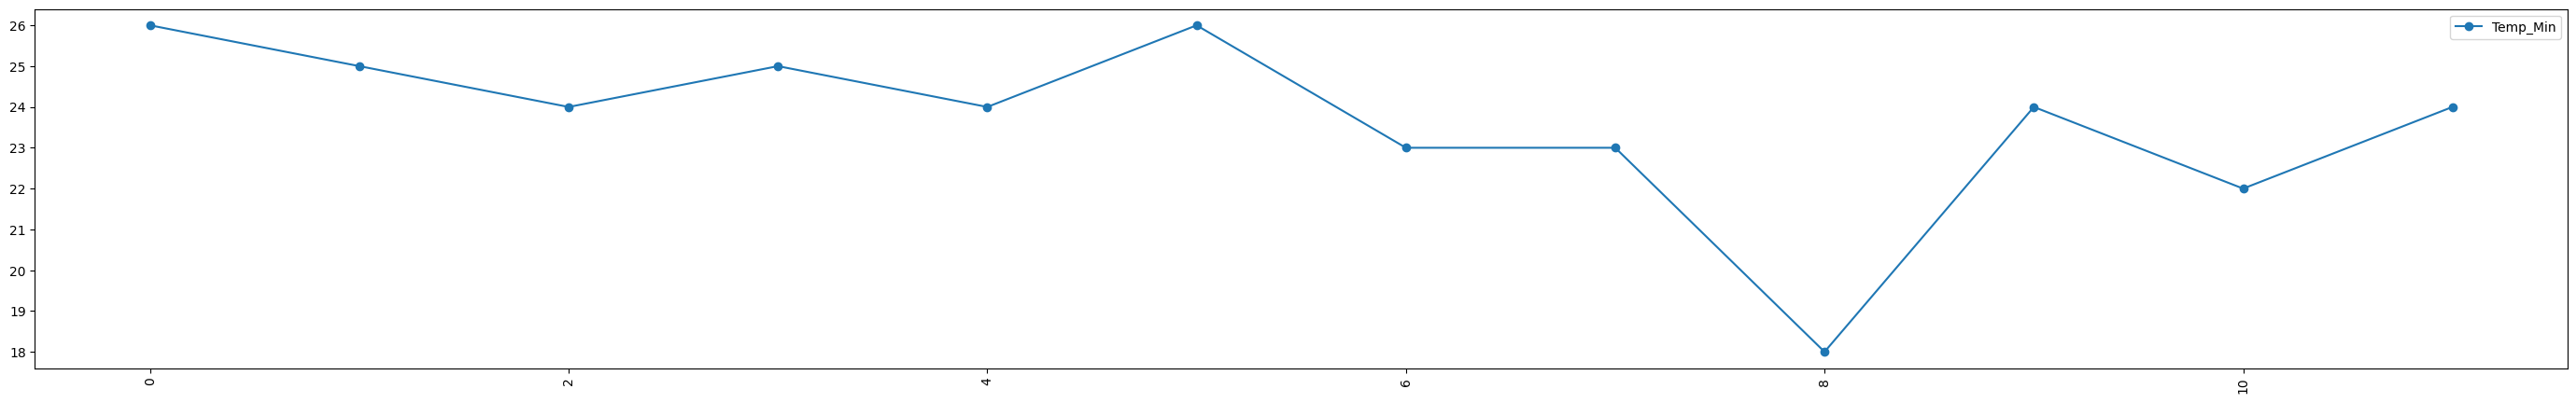

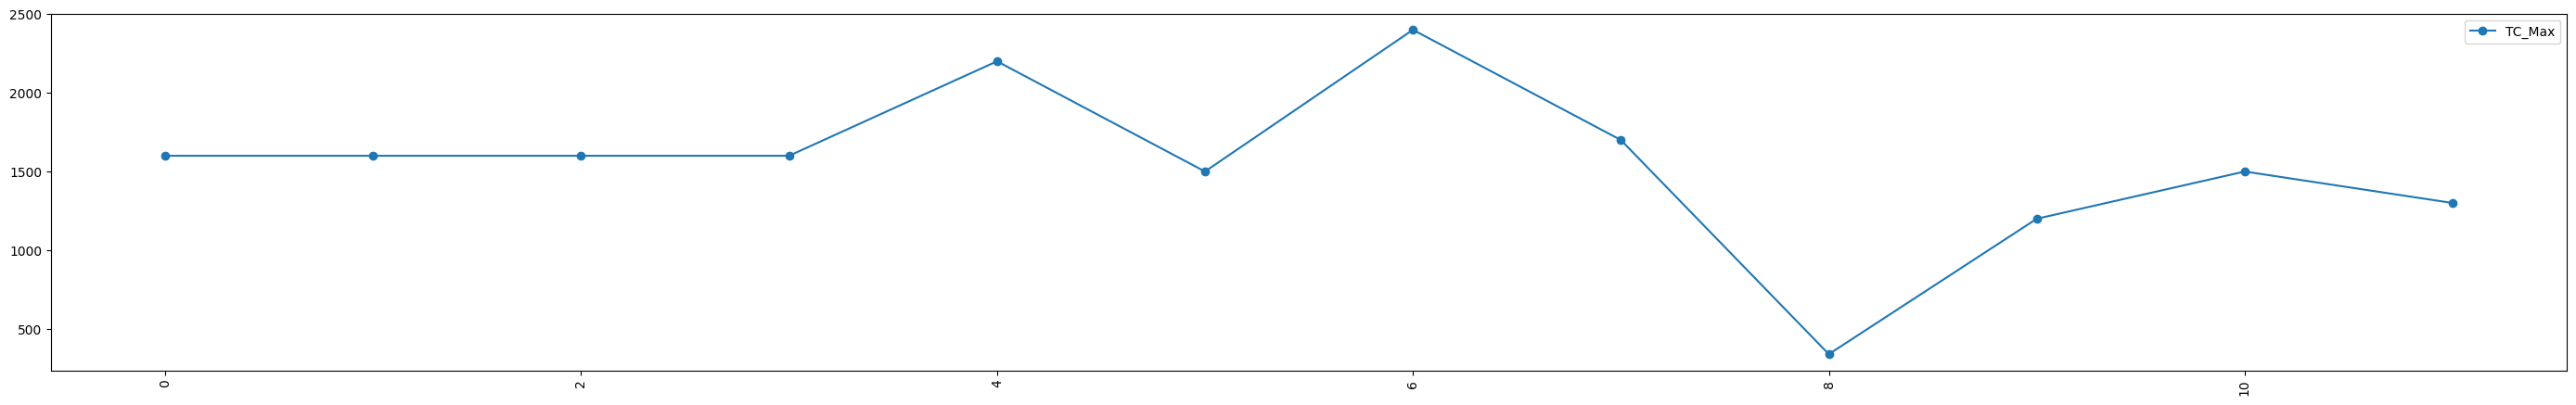

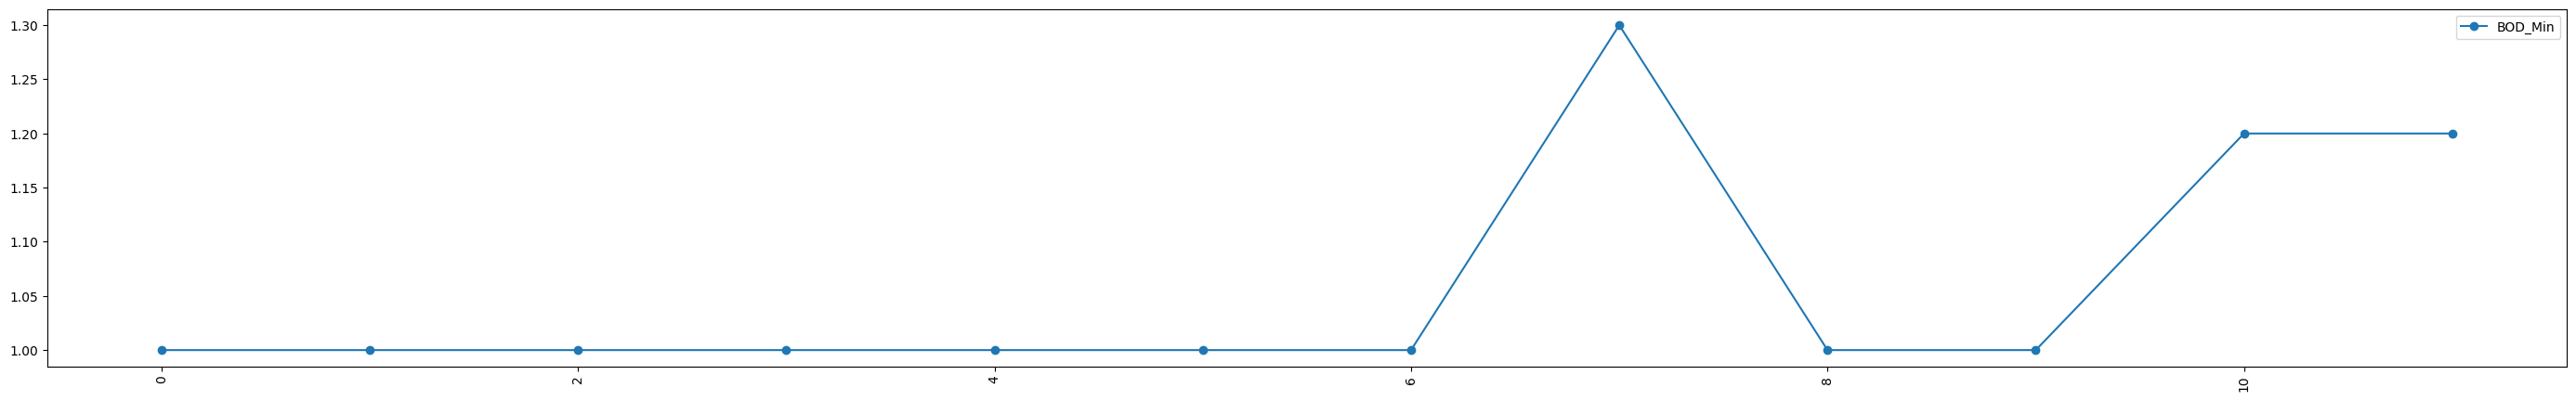

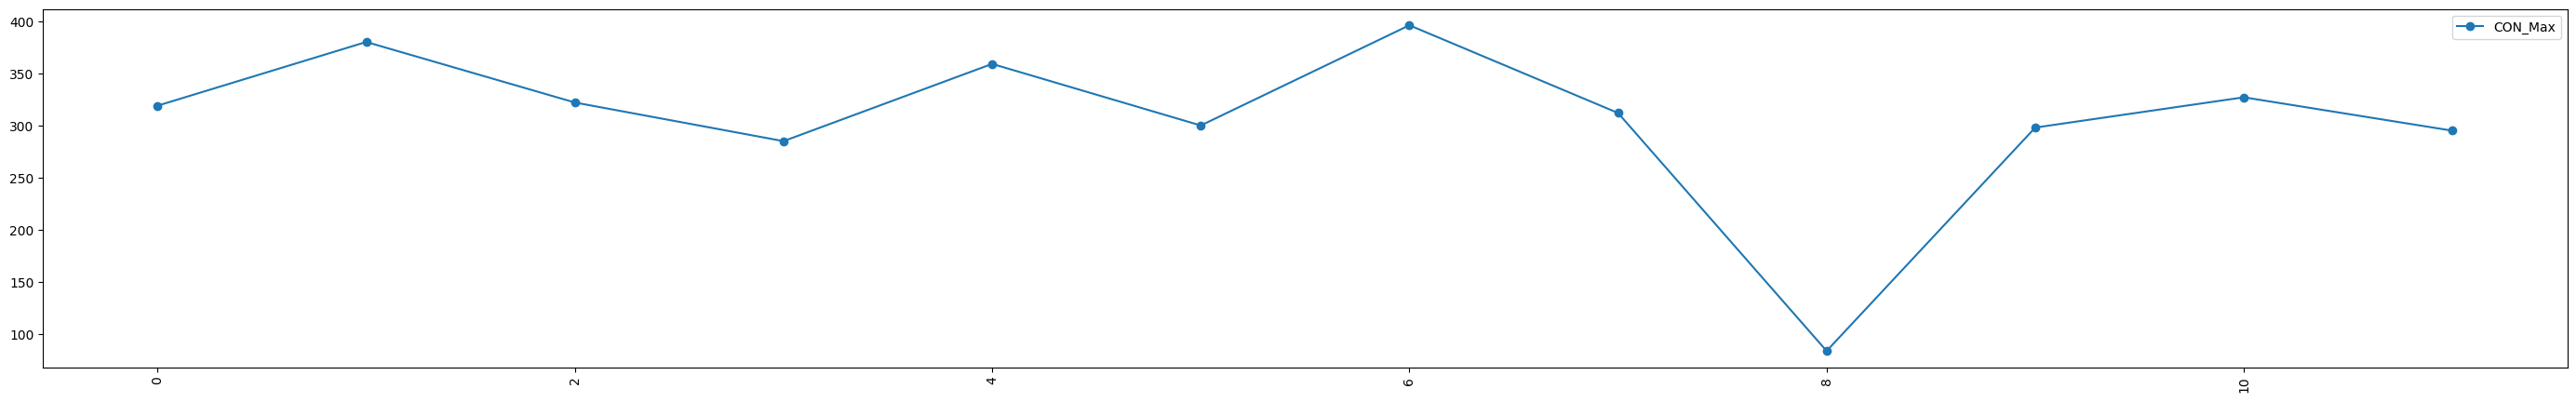

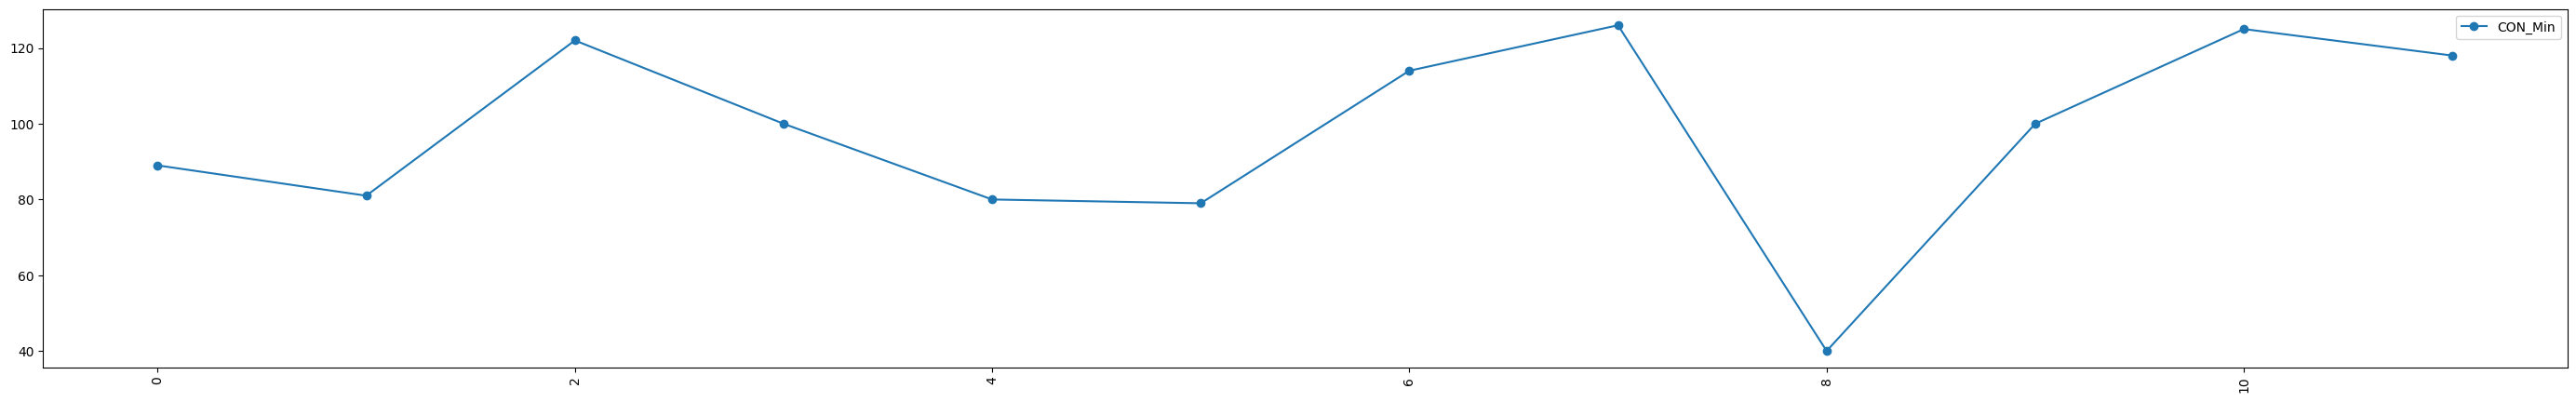

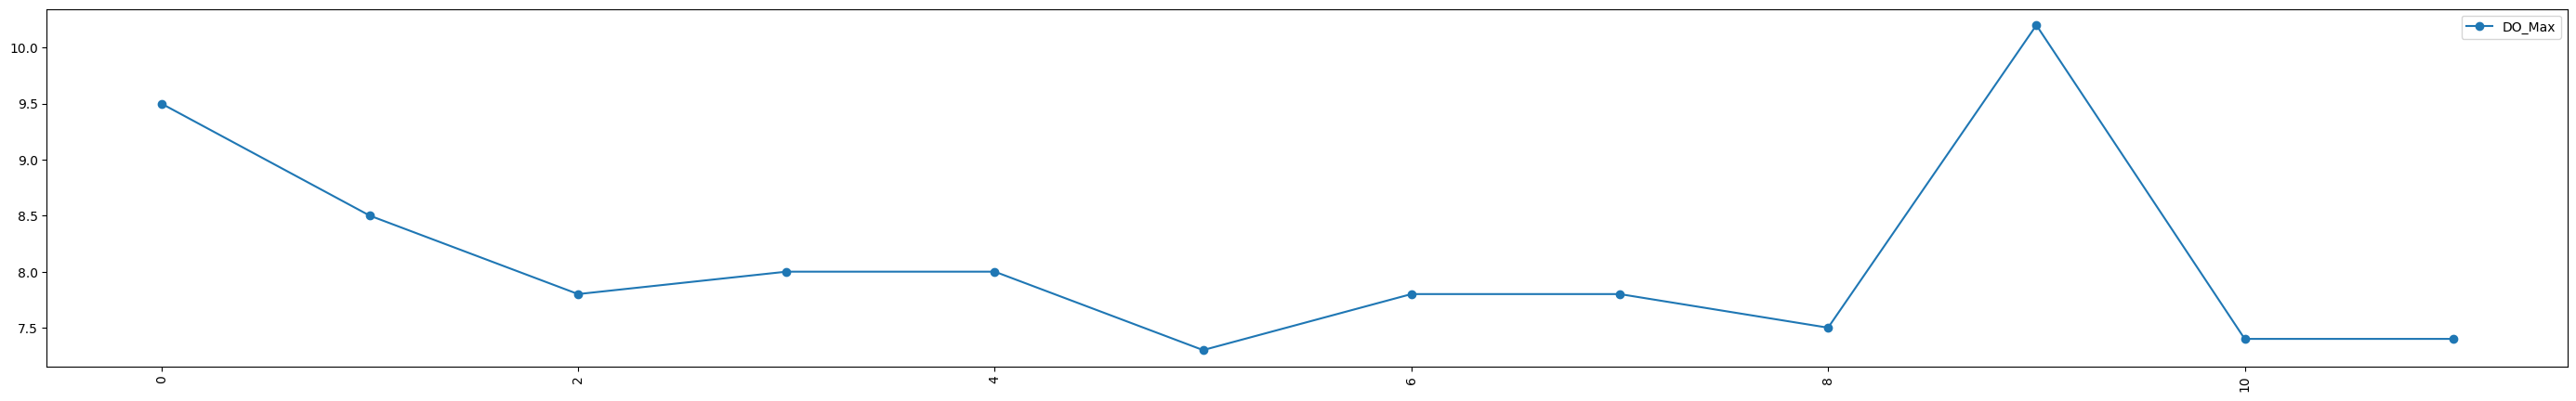

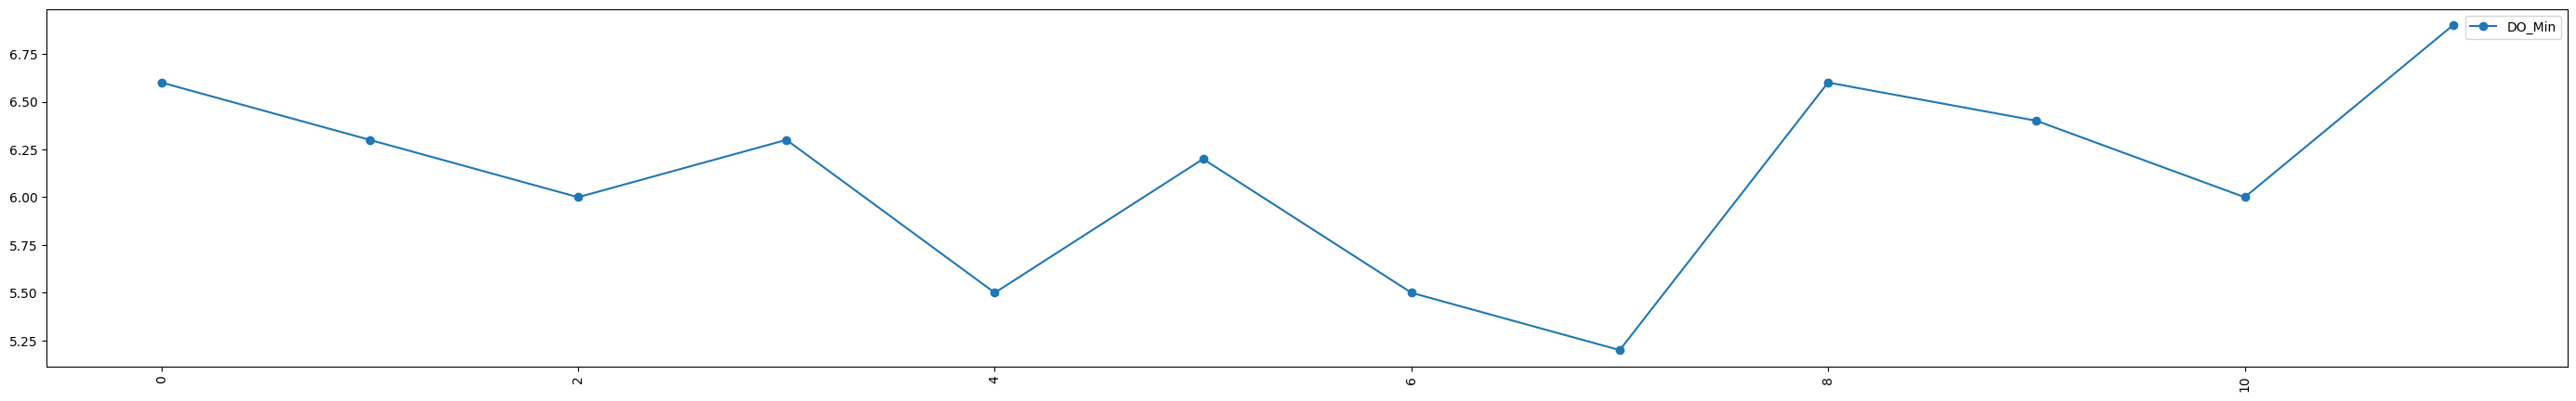

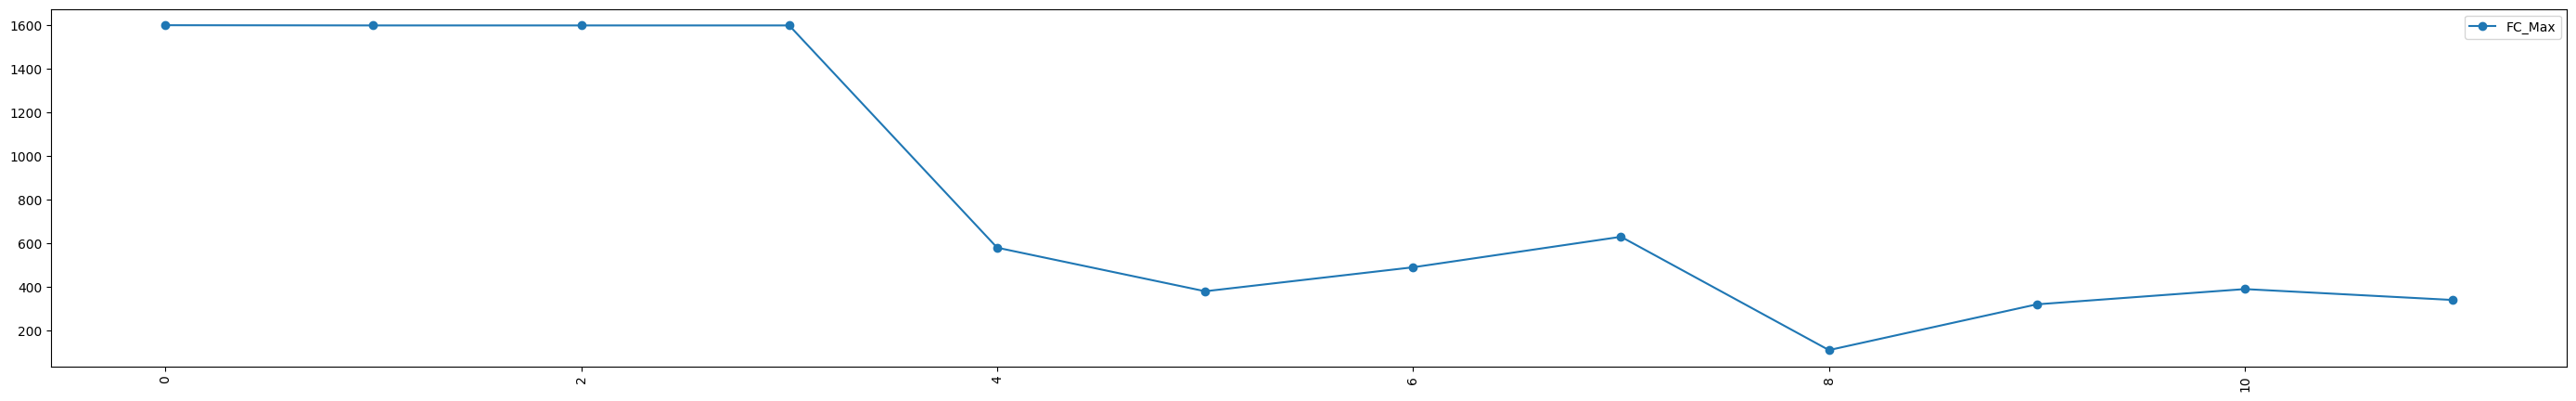

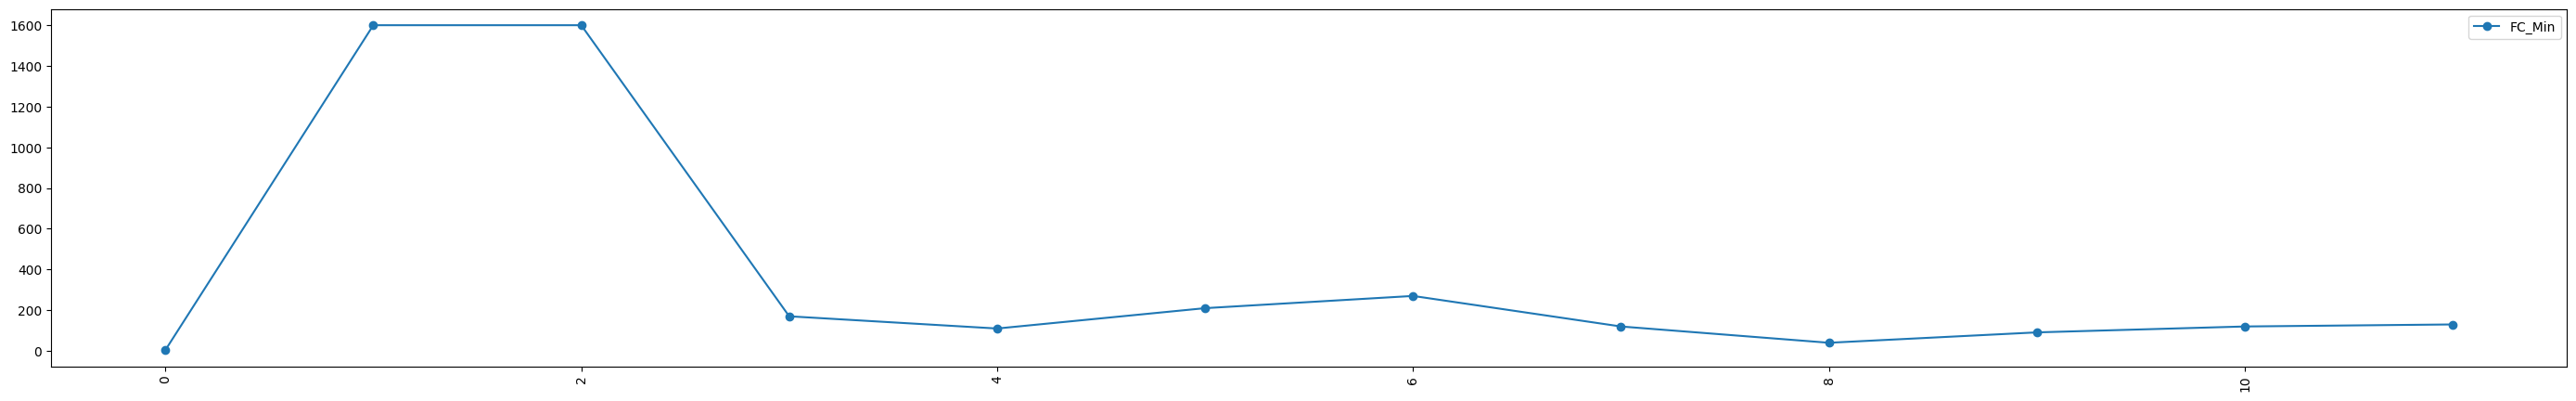

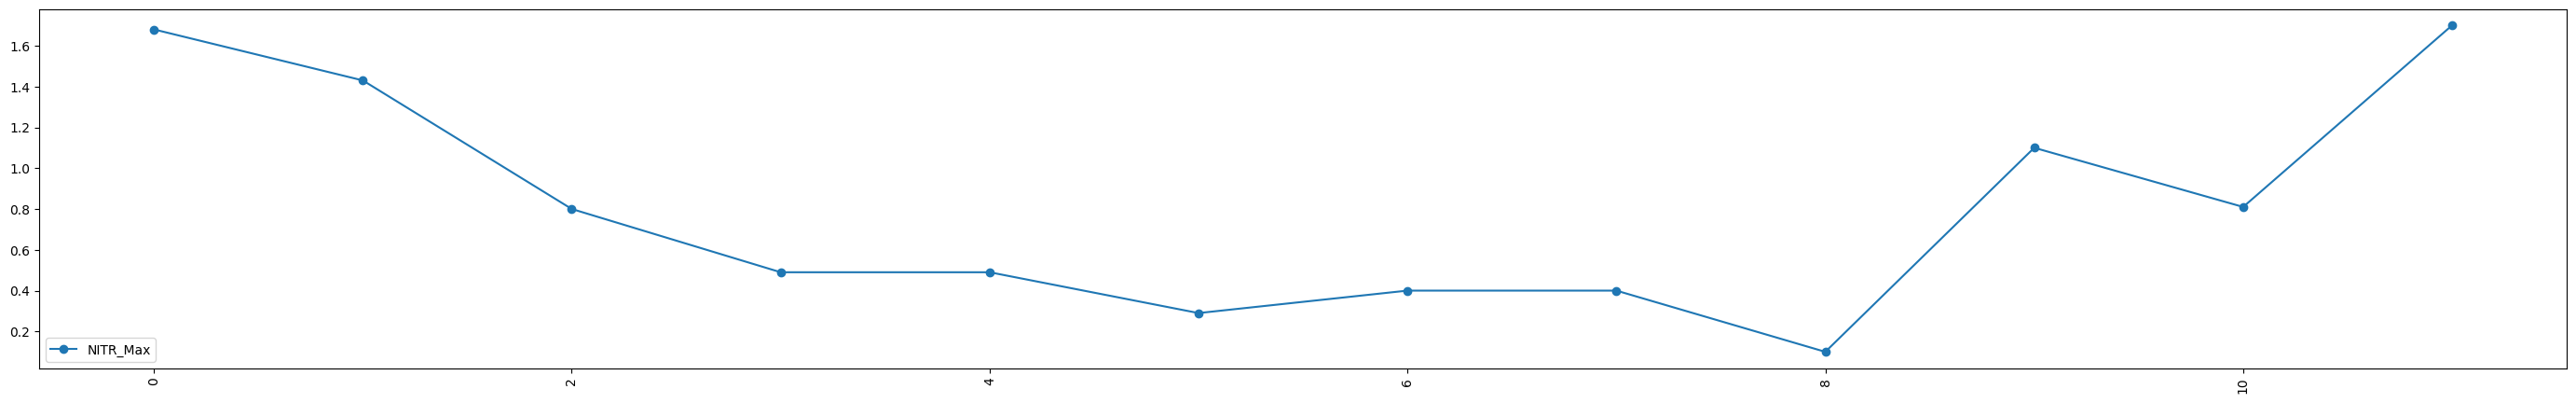

In [37]:
# Ploting the curve 
for i in features[1:]:
  plt.figure(figsize=(35,5))
  #plt.grid()
  plt.plot(df[i], marker='o', label=i)
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

In [38]:

ts_decomposition = seasonal_decompose(x=df[i], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

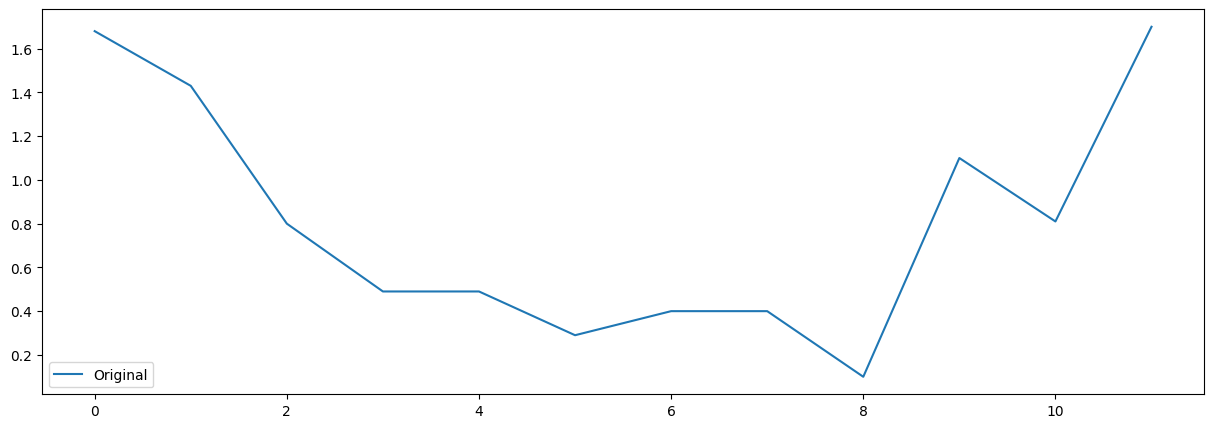

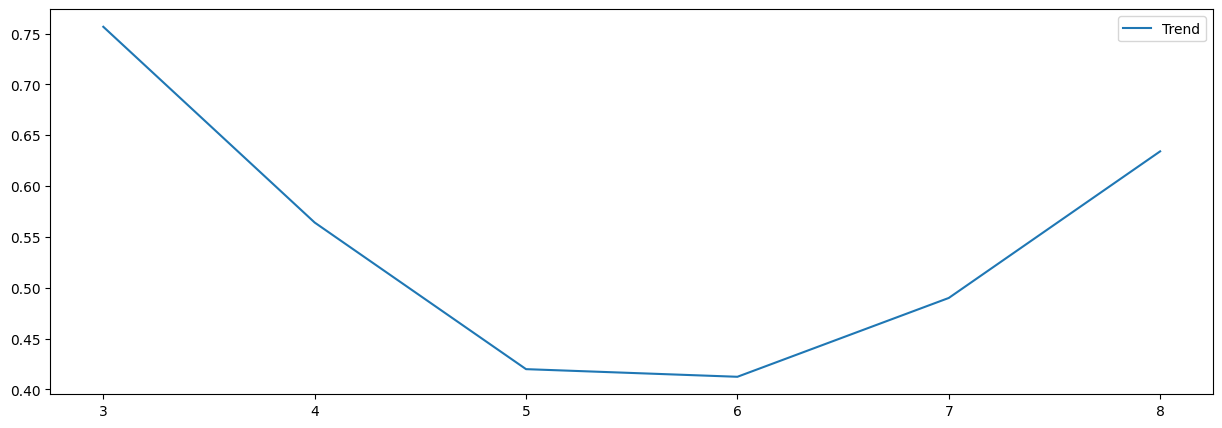

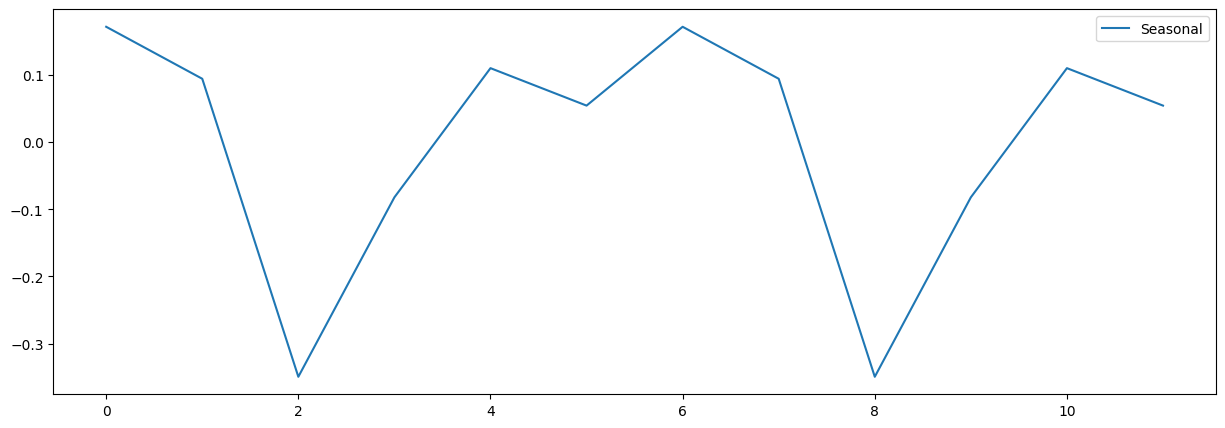

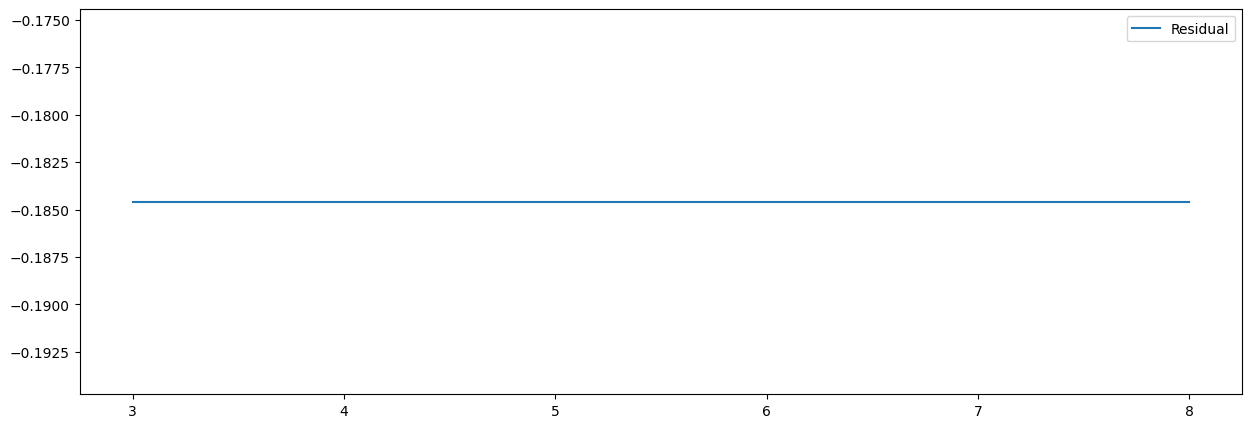

In [40]:
plt.figure(figsize=(15,5))
plt.plot(df[i], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

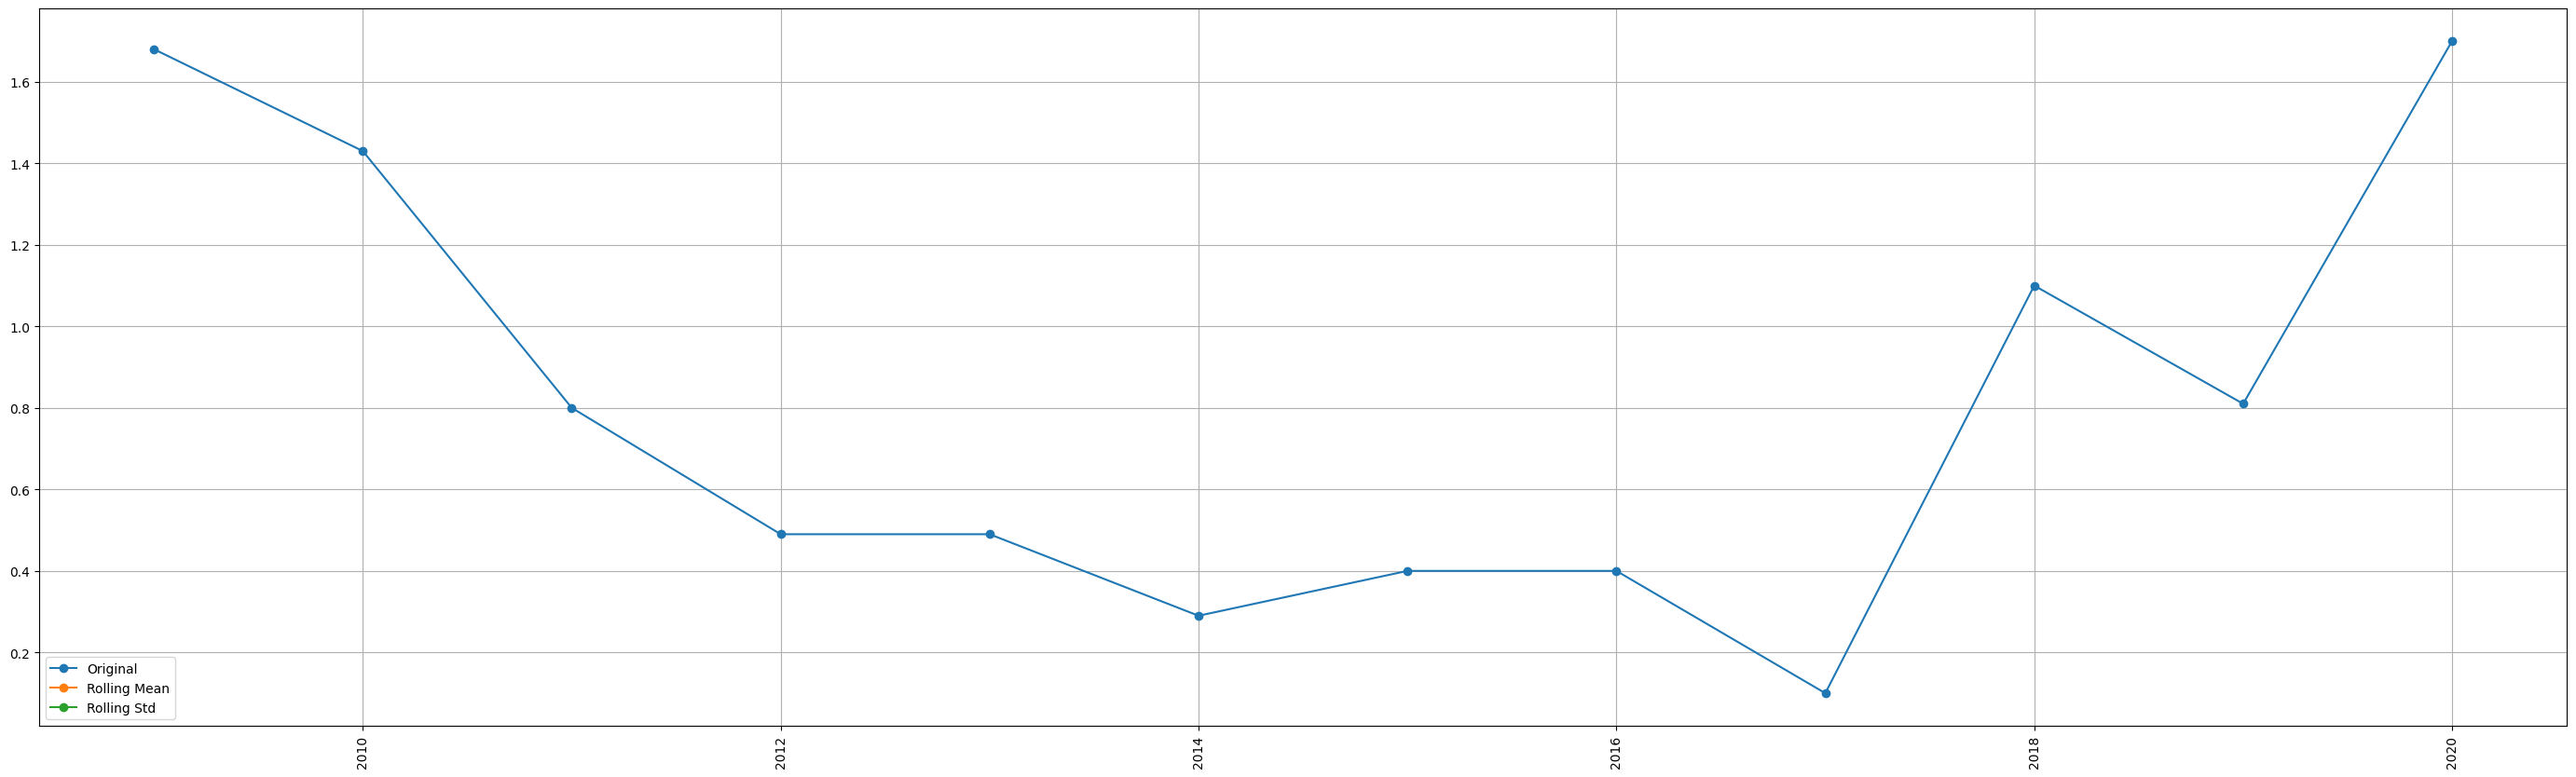

In [46]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(df['PARAMETERS'], df[i], marker='o', label='Original')
plt.plot(df['PARAMETERS'], df[i].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(df['PARAMETERS'], df[i].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [50]:
# ADF Test on each column
for name, column in df.drop(columns='PARAMETERS').diff().dropna().iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

<ipython-input-50-37cd14acb2d5>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df.drop(columns='PARAMETERS').diff().dropna().iteritems():


    Augmented Dickey-Fuller Test on "NITR_Min" 
    -----------------------------------------------
ADF Statistic: 2.133087
p-value: 0.998823
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Non-stationary


    Augmented Dickey-Fuller Test on "BOD_Max" 
    -----------------------------------------------
ADF Statistic: -3.690540
p-value: 0.004248
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "PH_Max" 
    -----------------------------------------------
ADF Statistic: -2.022986
p-value: 0.276586
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Non-stationary


    Augmented Dickey-Fuller Test on "Temp_Max" 
    -----------------------------------------------
ADF Statistic: -5.070926
p-value: 0.000016
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "PH_Min" 
    -----------------------------------------------
ADF Statistic: -4.771025
p-value: 0.000062
Critical Values

In [61]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['Temp_Min'],order=(1,1,1))

In [62]:
arima_model=model.fit()

<Axes: >

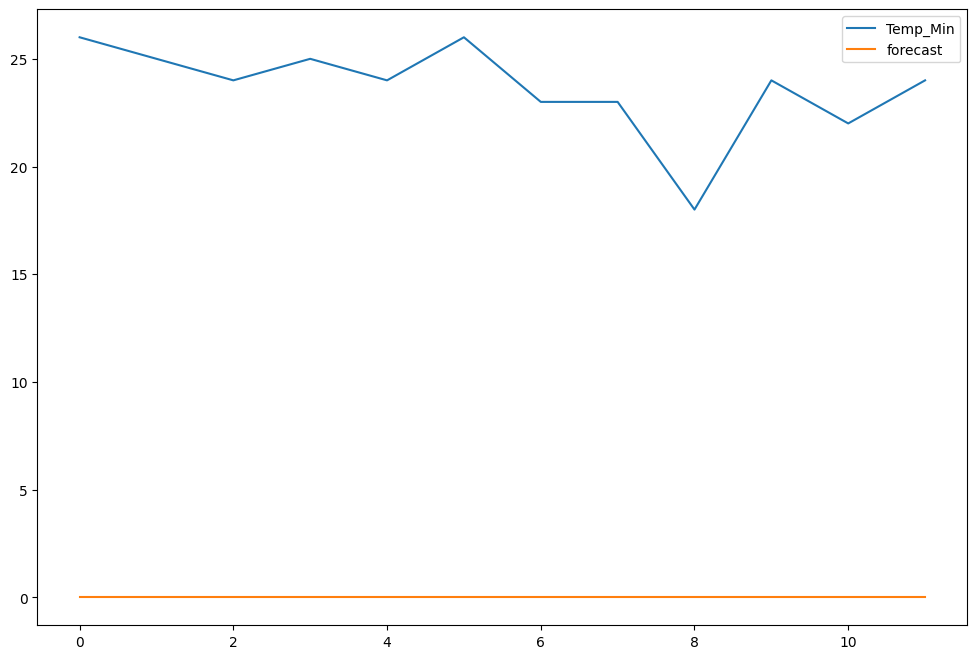

In [66]:
pred=pd.DataFrame()
pred['forecast']=arima_model.predict(dynamic=True)
pred['Temp_Min'] = df['Temp_Min']
pred[['Temp_Min','forecast']].plot(figsize=(12,8))

In [69]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Temp_Min'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
sarima_model=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: >

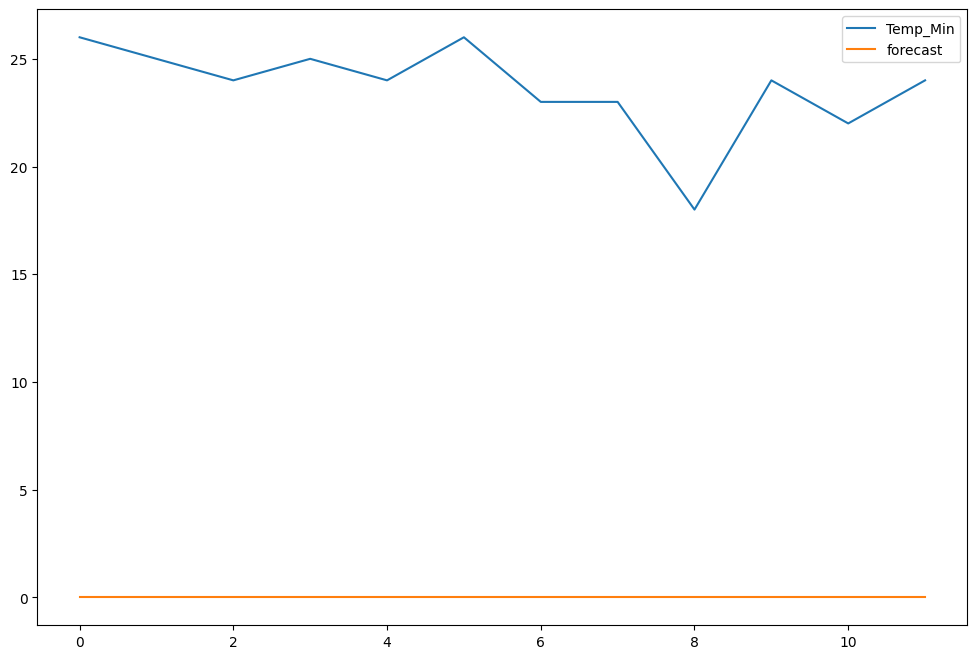

In [72]:
pred['forecast']=sarima_model.predict(dynamic=True)
pred[['Temp_Min','forecast']].plot(figsize=(12,8))

In [56]:
# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(df['Temp_Min'],X=df.drop(columns=['PARAMETERS','Temp_Min']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100, X=df.drop(columns=['PARAMETERS','Temp_Min']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(df['PARAMETERS'][-100:],df['Temp_Min'], marker='o', label='Test')
plt.plot(df['PARAMETERS'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(df['Temp_Min'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(df['Temp_Min'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(df['Temp_Min'])
a=a.reset_index()
a=a.drop(columns='index')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['Temp_Min']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Chnage']=abs(output['Difference']/output['Test'])*100
output

ValueError: ignored

In [1]:
from statsmodels.tsa.stattools import adfuller

In [2]:
def adf_test(sales):
    result=adfuller(sales)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [7]:
df.head()

,PARAMETERS,NITR_Min,BOD_Max,PH_Max,Temp_Max,PH_Min,TC_Min,Temp_Min,TC_Max,BOD_Min,CON_Max,CON_Min,DO_Max,DO_Min,FC_Max,FC_Min,NITR_Max
0,2009,0.17,1.0,8.9,30,6.8,7,26,1600,1.0,319,89,9.5,6.6,1601,4,1.68
1,2010,0.19,1.0,8.9,30,7.9,1600,25,1600,1.0,380,81,8.5,6.3,1600,1600,1.43
2,2011,0.12,1.0,8.9,28,8.1,1600,24,1600,1.0,322,122,7.8,6.0,1600,1600,0.80
3,2012,0.15,2.0,8.7,28,7.5,1100,25,1600,1.0,285,100,8.0,6.3,1600,170,0.49
4,2013,0.15,2.0,8.9,29,7.1,470,24,2200,1.0,359,80,8.0,5.5,580,110,0.49


In [15]:
adf_test(df['BOD_Max'])

Test parameters : -1.9962758600447688
p-value : 0.28820838836540086
#Lags Used : 0
Dataset observations : 11
Dataset is non-stationary 


In [16]:
df['Differencing']=df['Temp_Min']-df['Temp_Min'].shift(2)

In [17]:
df['Differencing']

0     NaN
1     NaN
2    -2.0
3     0.0
4     0.0
5     1.0
6    -1.0
7    -3.0
8    -5.0
9     1.0
10    4.0
11    0.0
Name: Differencing, dtype: float64

<Axes: >

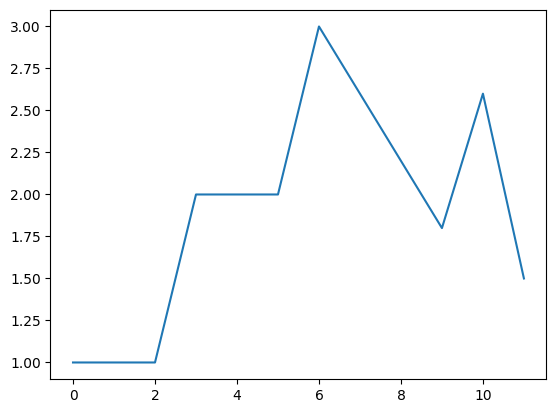

In [19]:
df['BOD_Max'].plot()

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(df['BOD_Max'],order=(1,1,1))
arima_model=model.fit()


<Axes: >

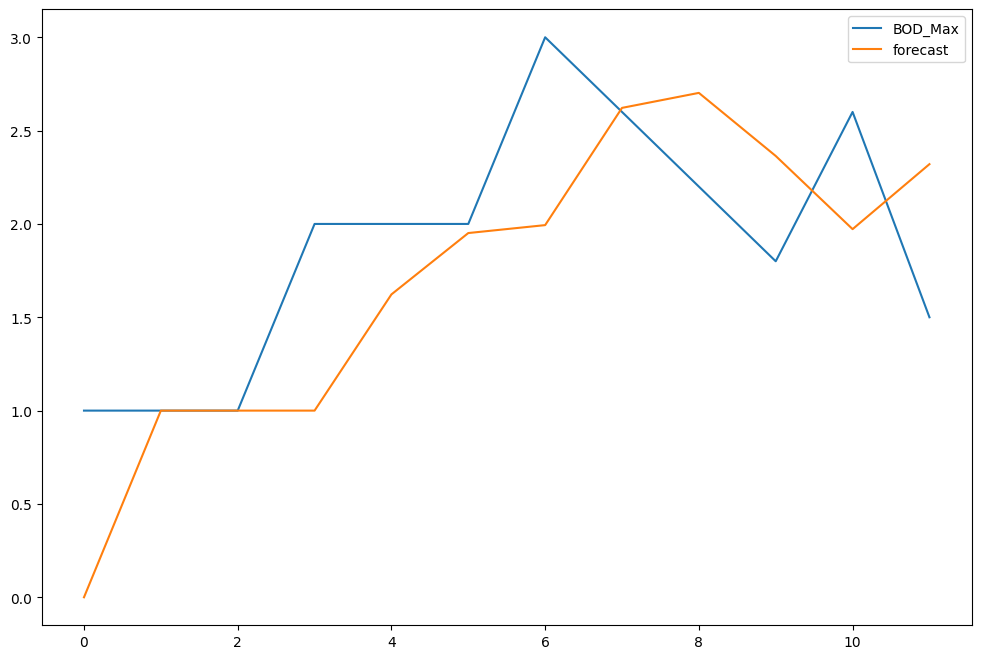

In [28]:
df['forecast']=arima_model.predict()
df[['BOD_Max','forecast']].plot(figsize=(12,8))

In [30]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['BOD_Max'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: >

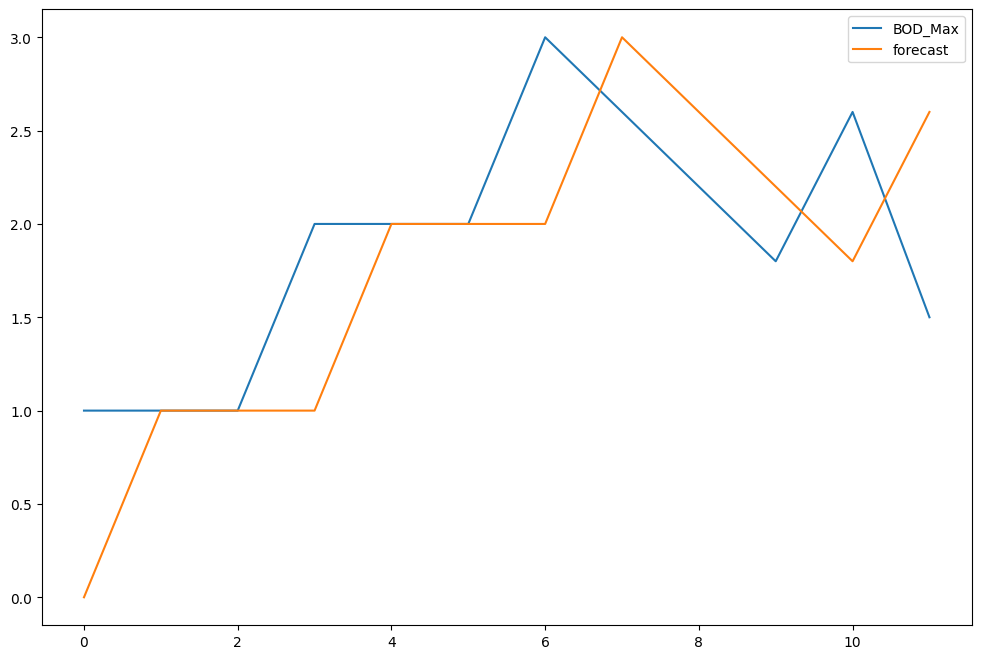

In [31]:
sarima_model=model.fit()
df['forecast']=sarima_model.predict()
df[['BOD_Max','forecast']].plot(figsize=(12,8))

In [49]:
X=df.drop(columns=['PARAMETERS','Differencing'])
X.dropna().reset_index(drop=True)
X

,NITR_Min,BOD_Max,PH_Max,Temp_Max,PH_Min,TC_Min,Temp_Min,TC_Max,BOD_Min,CON_Max,CON_Min,DO_Max,DO_Min,FC_Max,FC_Min,NITR_Max,forecast
0,0.17,1.0,8.9,30,6.8,7,26,1600,1.0,319,89,9.5,6.6,1601,4,1.68,0.0
1,0.19,1.0,8.9,30,7.9,1600,25,1600,1.0,380,81,8.5,6.3,1600,1600,1.43,1.0
2,0.12,1.0,8.9,28,8.1,1600,24,1600,1.0,322,122,7.8,6.0,1600,1600,0.80,1.0
3,0.15,2.0,8.7,28,7.5,1100,25,1600,1.0,285,100,8.0,6.3,1600,170,0.49,1.0
4,0.15,2.0,8.9,29,7.1,470,24,2200,1.0,359,80,8.0,5.5,580,110,0.49,2.0
5,0.06,2.0,8.9,30,7.4,840,26,1500,1.0,300,79,7.3,6.2,380,210,0.29,2.0
6,0.10,3.0,8.7,30,7.3,1100,23,2400,1.0,396,114,7.8,5.5,490,270,0.40,2.0
7,0.10,2.6,8.5,28,8.0,630,23,1700,1.3,312,126,7.8,5.2,630,120,0.40,3.0
8,0.10,2.2,8.5,30,6.5,270,18,340,1.0,84,40,7.5,6.6,110,40,0.10,2.6
9,0.09,1.8,8.5,27,7.4,700,24,1200,1.0,298,100,10.2,6.4,320,91,1.10,2.2


In [54]:
model = pm.auto_arima(df['BOD_Max'])

In [55]:
model.fit(df['BOD_Max'])

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [57]:
forecast=model.predict(n_periods=4, return_conf_int=True)
forecast

(12    1.636189
 13    1.708423
 14    1.746736
 15    1.767058
 dtype: float64,
 array([[0.56524069, 2.70713708],
        [0.4961578 , 2.9206888 ],
        [0.4975932 , 2.99587949],
        [0.50773449, 3.02638058]]))

<Axes: >

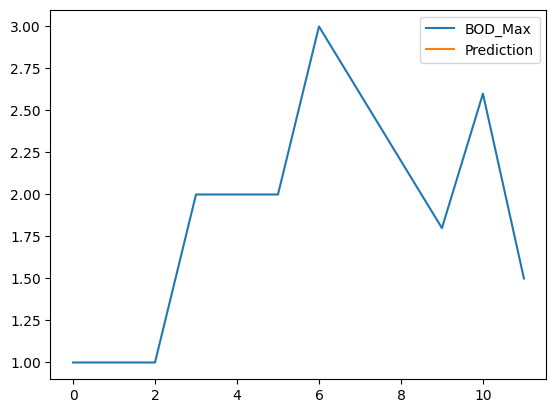

In [59]:
forecast_df = pd.DataFrame(forecast[0],index = df.index,columns=['Prediction'])
pd.concat([df['BOD_Max'],forecast_df],axis=1).plot()